In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import early_stopping
import lightgbm as lgb
%matplotlib inline

In [2]:
df_train=pd.read_csv("/kaggle/input/playground-series-s3e16/train.csv")
df_test=pd.read_csv("/kaggle/input/playground-series-s3e16/test.csv")

In [3]:
df_train.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [4]:
df_test.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,74051,I,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
1,74052,I,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
2,74053,F,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
3,74054,F,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
4,74055,I,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066


# Data Analysis

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  object 
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.6+ MB


In [6]:
df_train.describe()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
mean,37025.000000,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870,9.967806
std,21376.826729,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372,3.175189
min,0.000000,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,18512.500000,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930,8.000000
50%,37025.000000,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453,10.000000
75%,55537.500000,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840,11.000000
max,74050.000000,2.012815,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [7]:
df_train.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [8]:
df_train["Sex"].value_counts()

M    27084
I    23957
F    23010
Name: Sex, dtype: int64

In [9]:
df_test.describe()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
count,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000
mean,98734.500000,1.319795,1.026357,0.348693,23.464627,10.130220,5.072615,6.745876
std,14251.458382,0.286950,0.236593,0.092259,12.641703,5.611779,2.791563,3.575650
min,74051.000000,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524
25%,86392.750000,1.162500,0.887500,0.300000,13.536886,5.740774,2.877474,3.968930
50%,98734.500000,1.387500,1.075000,0.362500,23.813580,9.979024,4.989512,6.945627
75%,111076.250000,1.537500,1.200000,0.412500,32.290081,14.047177,7.016501,9.171063
max,123418.000000,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49368 entries, 0 to 49367
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              49368 non-null  int64  
 1   Sex             49368 non-null  object 
 2   Length          49368 non-null  float64
 3   Diameter        49368 non-null  float64
 4   Height          49368 non-null  float64
 5   Weight          49368 non-null  float64
 6   Shucked Weight  49368 non-null  float64
 7   Viscera Weight  49368 non-null  float64
 8   Shell Weight    49368 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 3.4+ MB


In [11]:
df_test.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
dtype: int64

# Data Correlation Heatmap

/tmp/ipykernel_2993/1048663316.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  my_corr=df_train.corr()


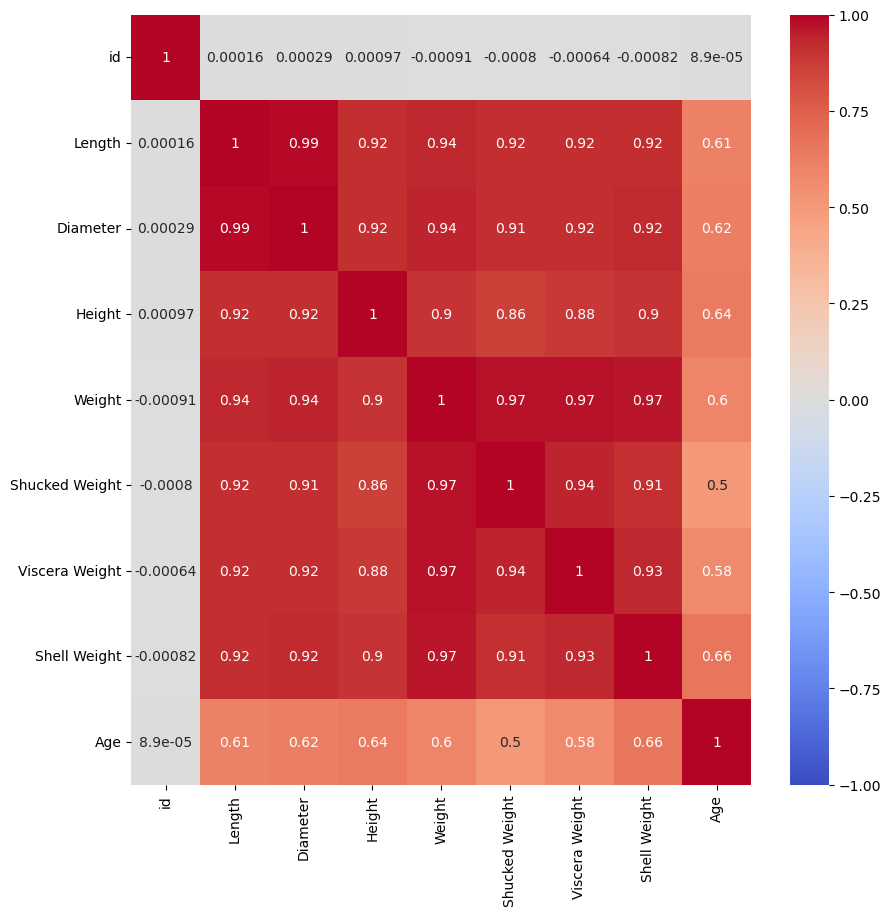

In [12]:
plt.figure(figsize=(10,10))
my_corr=df_train.corr()
sns.heatmap(my_corr,vmin=-1,vmax=1,annot=True,cmap="coolwarm")
plt.show()

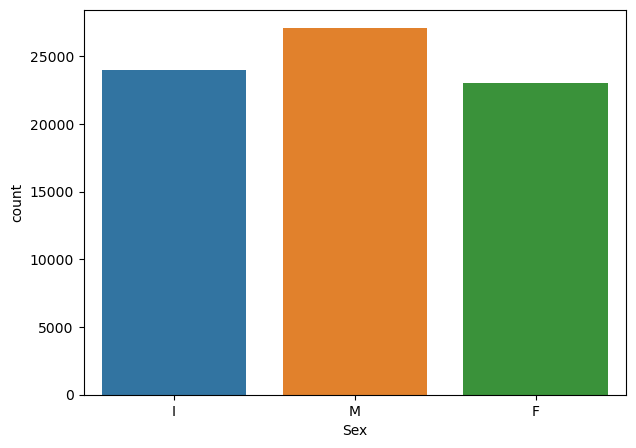

In [13]:
plt.figure(figsize=(7,5))
sns.countplot(data=df_train,x="Sex")
plt.show()

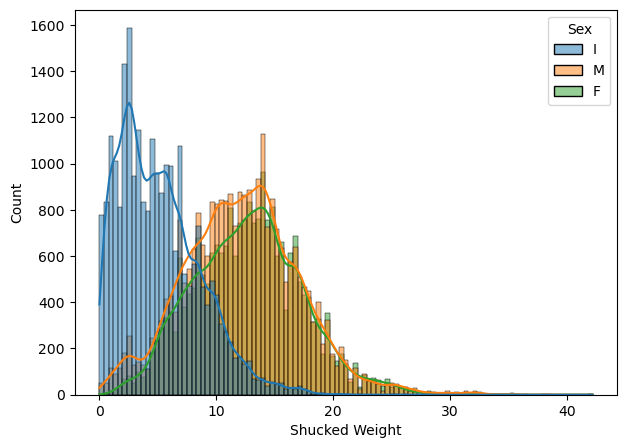

In [14]:
plt.figure(figsize=(7,5))
sns.histplot(data=df_train, x="Shucked Weight",hue="Sex",kde=True)
plt.show()

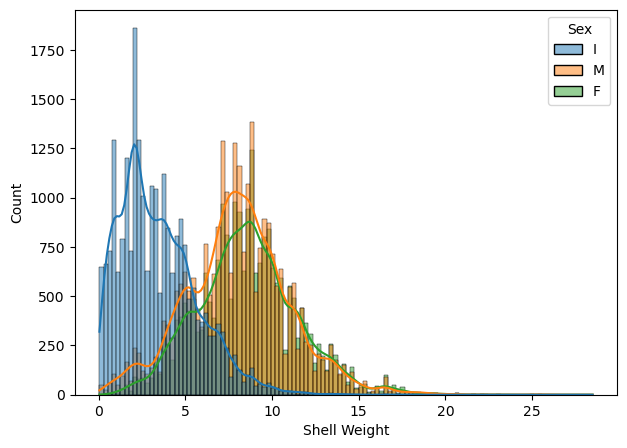

In [15]:
plt.figure(figsize=(7,5))
sns.histplot(data=df_train, x="Shell Weight",hue="Sex",kde=True)
plt.show()

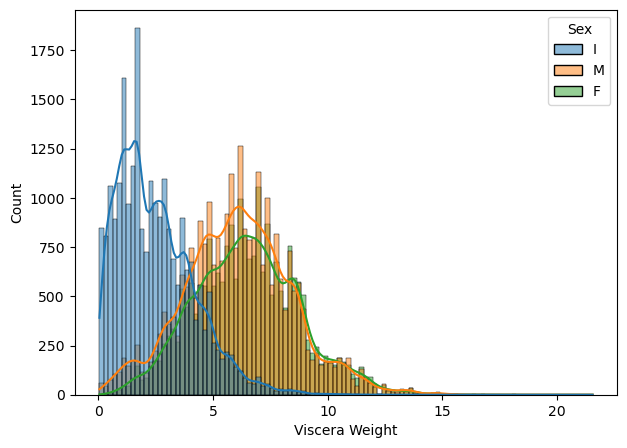

In [16]:
plt.figure(figsize=(7,5))
sns.histplot(data=df_train, x="Viscera Weight",hue="Sex",kde=True)
plt.show()

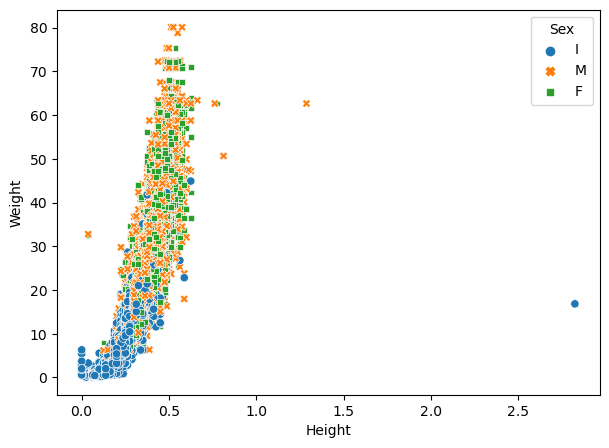

In [17]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_train, x="Height", y="Weight", hue="Sex", style="Sex")
plt.show()

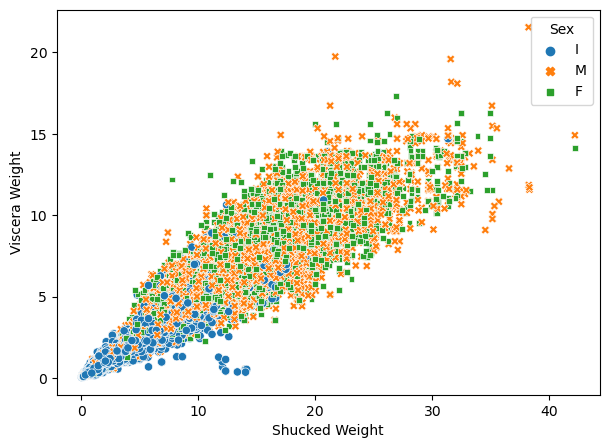

In [18]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_train, x="Shucked Weight", y="Viscera Weight", hue="Sex", style="Sex")
plt.show()

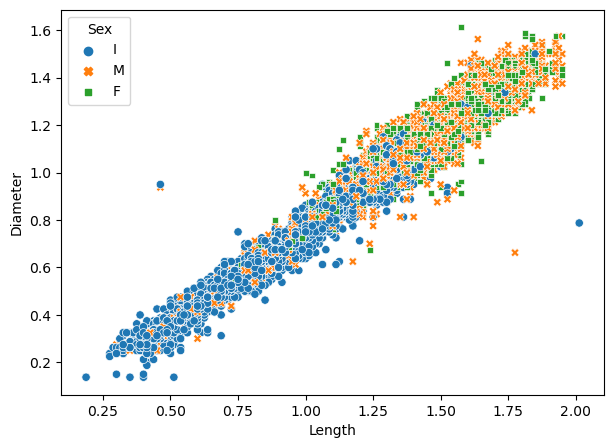

In [19]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_train, x="Length", y="Diameter", hue="Sex", style="Sex")
plt.show()

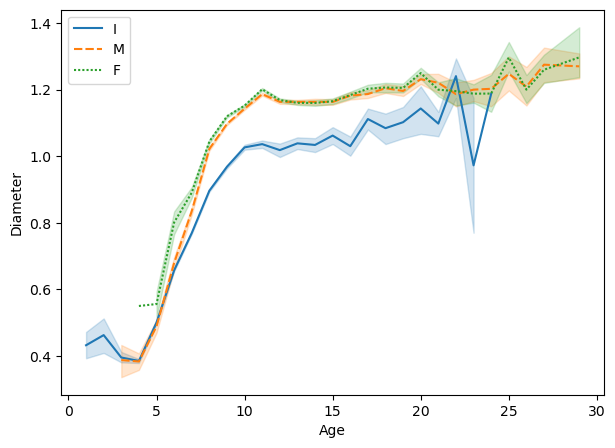

In [20]:
plt.figure(figsize=(7,5))
sns.lineplot(data=df_train, x="Age", y="Diameter",hue="Sex",style="Sex")
plt.legend()
plt.show()

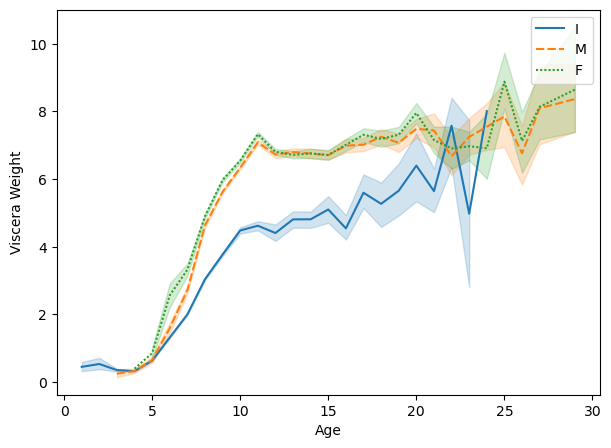

In [21]:
plt.figure(figsize=(7,5))
sns.lineplot(data=df_train, x="Age", y="Viscera Weight",hue="Sex",style="Sex")
plt.legend()
plt.show()

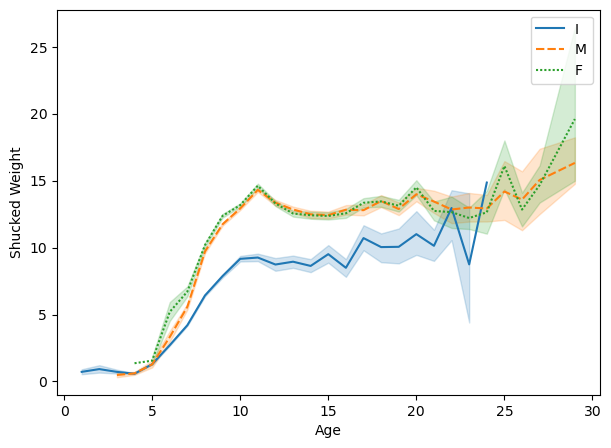

In [22]:
plt.figure(figsize=(7,5))
sns.lineplot(data=df_train, x="Age", y="Shucked Weight",hue="Sex",style="Sex")
plt.legend()
plt.show()

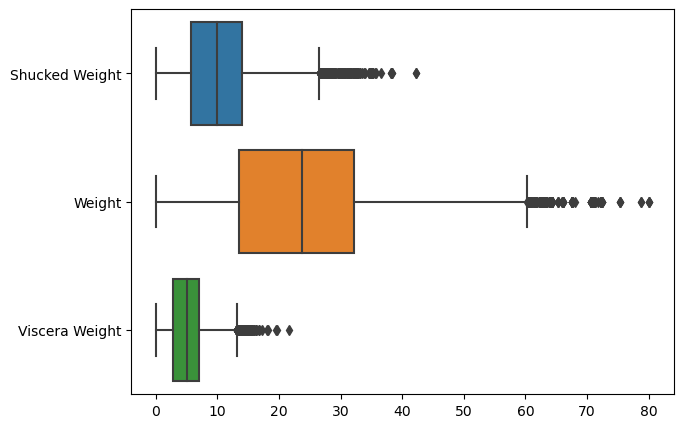

In [23]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df_train[["Shucked Weight", "Weight","Viscera Weight"]], orient="h")
plt.show()

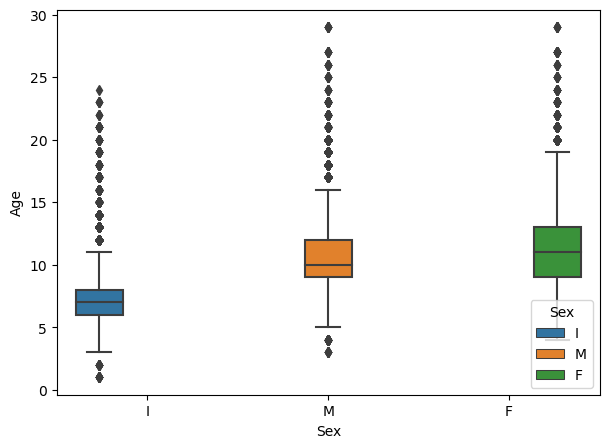

In [24]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df_train, y="Age", x="Sex", hue="Sex")
plt.show()

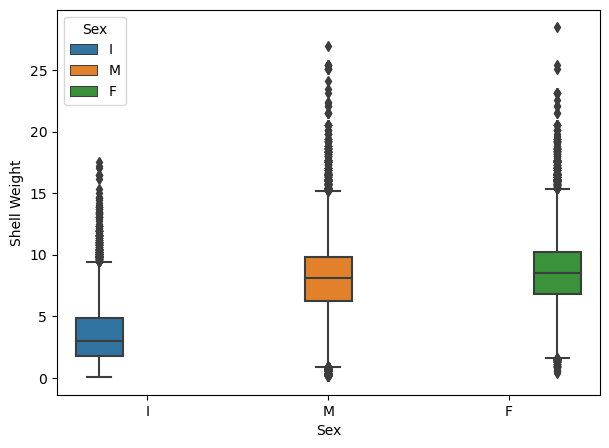

In [25]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df_train, y="Shell Weight", x="Sex", hue="Sex")
plt.show()

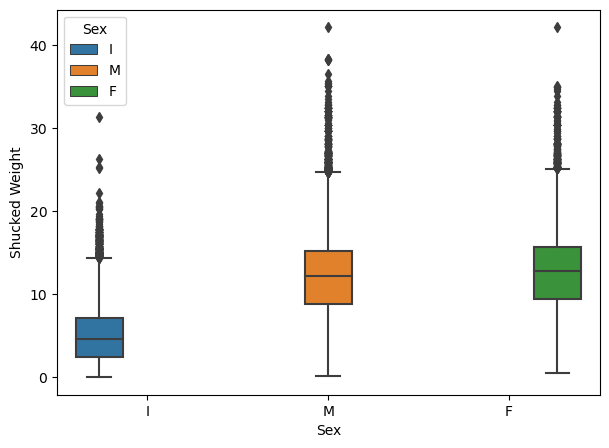

In [26]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df_train, y="Shucked Weight", x="Sex", hue="Sex")
plt.show()

In [27]:
label_encoder = LabelEncoder()
df_train["Sex"]=label_encoder.fit_transform(df_train["Sex"])
df_train.drop("id",axis=1,inplace=True)
df_train.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,1,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,0,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,1,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [28]:
scaler = StandardScaler()
col_scale = ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight']
df_train[col_scale] = scaler.fit_transform(df_train[col_scale])

In [29]:
df_train.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,1,0.721238,0.633982,0.292400,0.441804,0.467188,0.569186,0.453376,9
1,1,-0.755712,-0.840356,-0.794163,-1.025198,-0.993688,-0.978880,-0.926788,8
2,2,0.243401,0.370707,0.292400,0.110076,0.219924,0.178363,-0.017224,9
3,0,1.329394,1.634426,1.650603,2.156483,1.824616,2.124622,2.308095,11
4,1,-0.234435,-0.050532,-0.115061,-0.007598,0.333464,-0.197233,-0.214955,8


# Train aNd Label Data

In [30]:
col_scale = ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight']
train_data=df_train[col_scale]

In [31]:
label_data=df_train["Age"]

# Split Data

In [32]:
X_train,X_test,Y_train,Y_test=train_test_split(train_data,label_data,test_size=0.2,random_state=42)

# LinearRegression Model

In [33]:
ln_model=LinearRegression()
ln_model.fit(X_train,Y_train)


LinearRegression()

# MSE,MAE,R2_SCORE_LinearRegressionModel

In [34]:
ln_pred=ln_model.predict(X_test)
mse = mean_squared_error(Y_test,ln_pred)
print("Mean Squared Error:", mse)
mae = mean_absolute_error(Y_test,ln_pred)
print("Mean Absolute Error:", mae)
r2 = r2_score(Y_test,ln_pred)
print("R2 Score:", r2)

Mean Squared Error: 4.644759497262968
Mean Absolute Error: 1.511752255988135
R2 Score: 0.5442546217213098


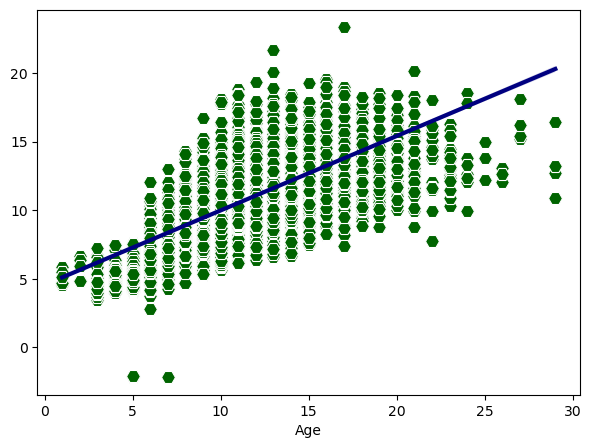

In [35]:
plt.figure(figsize=(7,5))
sns.regplot(x=Y_test,y=ln_pred,color="navy",line_kws={'linewidth': 3},scatter=False)
sns.scatterplot(x=Y_test, y=ln_pred,color="darkgreen",marker="H",s=100)

plt.show()

# RandomForestRegressor Model

In [36]:
random_regr= RandomForestRegressor(random_state=0)
random_regr.fit(X_train,Y_train)


RandomForestRegressor(random_state=0)

# MSE,MAE,R2 Score_RandomForestRegressor

In [37]:
rfr_pred=random_regr.predict(X_test)
mse1 = mean_squared_error(Y_test,rfr_pred)
print("Mean Squared Error:", mse1)
mae1= mean_absolute_error(Y_test,rfr_pred)
print("Mean Absolute Error:", mae1)
r21 = r2_score(Y_test,rfr_pred)
print("R2 Score:", r21)

Mean Squared Error: 4.49426042330726
Mean Absolute Error: 1.4921886735834478
R2 Score: 0.559021641936448


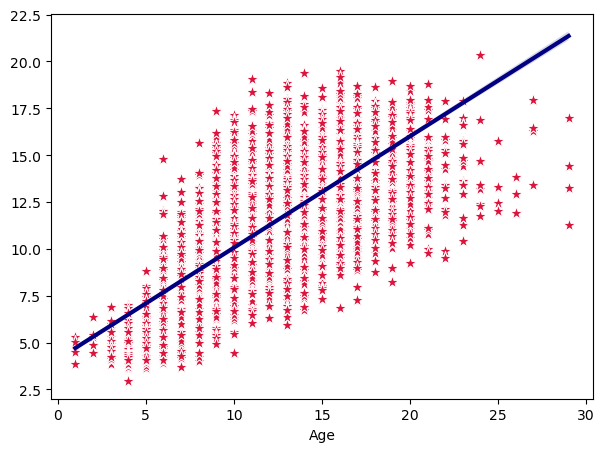

In [38]:
plt.figure(figsize=(7,5))
sns.regplot(x=Y_test,y=rfr_pred,color="navy",line_kws={'linewidth': 3},scatter=False)
sns.scatterplot(x=Y_test, y=rfr_pred,color="crimson",marker="*",s=100)

plt.show()

# GradientBoostingRegressor Model

In [39]:
gb= GradientBoostingRegressor(random_state=0)
gb.fit(X_train,Y_train)

GradientBoostingRegressor(random_state=0)

# MSE,MAE,R2 SCORE_GradientBoostingRegressor

In [40]:
gb_pred=gb.predict(X_test)
mse2 = mean_squared_error(Y_test,gb_pred)
print("Mean Squared Error:", mse2)
mae2= mean_absolute_error(Y_test,gb_pred)
print("Mean Absolute Error:", mae2)
r22 = r2_score(Y_test,gb_pred)
print("R2 Score:", r22)

Mean Squared Error: 4.33095228192269
Mean Absolute Error: 1.4475220095553978
R2 Score: 0.5750454921950369


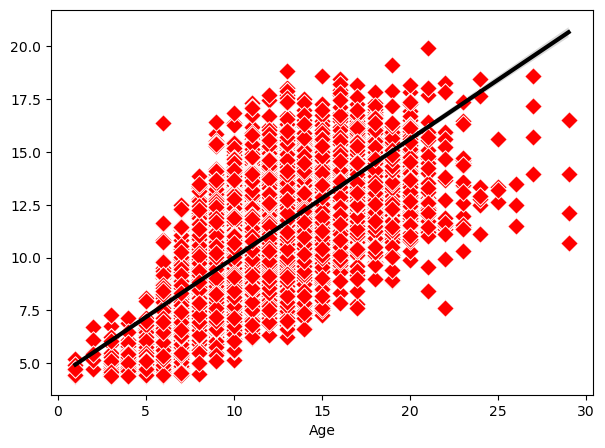

In [41]:
plt.figure(figsize=(7,5))
sns.regplot(x=Y_test,y=gb_pred,color="black",line_kws={'linewidth': 3},scatter=False)
sns.scatterplot(x=Y_test, y=gb_pred,color="red",marker="D",s=80)

plt.show()

# XGBRegressor Model

In [42]:
xgb = XGBRegressor()
xgb.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

# MSE,MAE,R2_XGBRegressor Model

In [43]:
xgb_pred=xgb.predict(X_test)
mse3 = mean_squared_error(Y_test,xgb_pred)
print("Mean Squared Error:", mse3)
mae3= mean_absolute_error(Y_test,xgb_pred)
print("Mean Absolute Error:", mae3)
r23 = r2_score(Y_test,xgb_pred)
print("R2 Score:", r23)

Mean Squared Error: 4.340277976586707
Mean Absolute Error: 1.439836520216964
R2 Score: 0.5741304518695113


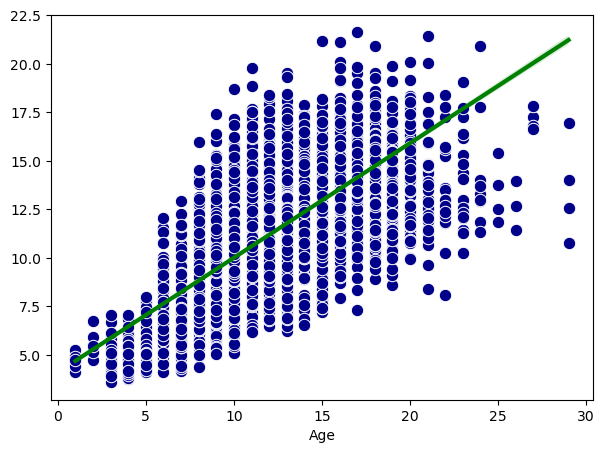

In [44]:
plt.figure(figsize=(7,5))
sns.regplot(x=Y_test,y=xgb_pred,color="green",line_kws={'linewidth': 3},scatter=False)
sns.scatterplot(x=Y_test, y=xgb_pred,color="darkblue",marker="o",s=80)

plt.show()

# Ridge Model

In [45]:
rd=Ridge(alpha=1.0)
rd.fit(X_train,Y_train)

Ridge()

In [46]:
rd_pred=rd.predict(X_test)
mse4 = mean_squared_error(Y_test,rd_pred)
print("Mean Squared Error:", mse4)
mae4= mean_absolute_error(Y_test,rd_pred)
print("Mean Absolute Error:", mae4)
r24 = r2_score(Y_test,rd_pred)
print("R2 Score:", r24)

Mean Squared Error: 4.644719699248851
Mean Absolute Error: 1.5117401173053042
R2 Score: 0.5442585267159623


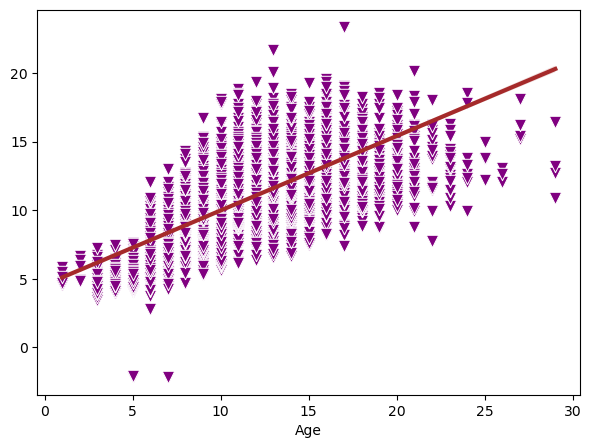

In [47]:
plt.figure(figsize=(7,5))
sns.regplot(x=Y_test,y=rd_pred,color="brown",line_kws={'linewidth': 3},scatter=False)
sns.scatterplot(x=Y_test, y=rd_pred,color="purple",marker="v",s=80)

plt.show()

# Create LGB Model

In [48]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['rmse','mae'],
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

In [49]:
lgb_train = lgb.Dataset(X_train, Y_train)
lgb_eval = lgb.Dataset(X_test, Y_test, reference=lgb_train)
callbacks = [lgb.early_stopping(40),lgb.log_evaluation()]
lgb_model = lgb.train(params,train_set=lgb_train,valid_sets=[lgb_train, lgb_eval],callbacks=callbacks)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003665 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[1]	training's rmse: 3.0935	training's l1: 2.26097	valid_1's rmse: 3.11393	valid_1's l1: 2.28382
Training until validation scores don't improve for 40 rounds
[2]	training's rmse: 3.01502	training's l1: 2.20523	valid_1's rmse: 3.03436	valid_1's l1: 2.2262
[3]	training's rmse: 2.94208	training's l1: 2.15253	valid_1's rmse: 2.96016	valid_1's l1: 2.17186
[4]	training's rmse: 2.87432	training's l1: 2.10219	valid_1's rmse: 2.89117	valid_1's l1: 2.11975
[5]	training's rmse: 2.8116	training's l1: 2.05518	valid_1's rmse: 2.82723	valid_1's l1: 2.07121
[6]	training's rmse: 2.75344	training's l1: 2.01107	valid_1's rmse: 2.7683	valid_1's l1: 2.02613
[7]	training's rmse: 2.69944	t

In [50]:
lgb_pred=lgb_model.predict(X_test)
mse5 = mean_squared_error(Y_test,lgb_pred)
print("Mean Squared Error:", mse5)
mae5= mean_absolute_error(Y_test,lgb_pred)
print("Mean Absolute Error:", mae5)
r25 = r2_score(Y_test,lgb_pred)
print("R2 Score:", r25)

Mean Squared Error: 4.262201584302853
Mean Absolute Error: 1.4333895436261992
R2 Score: 0.581791333979125


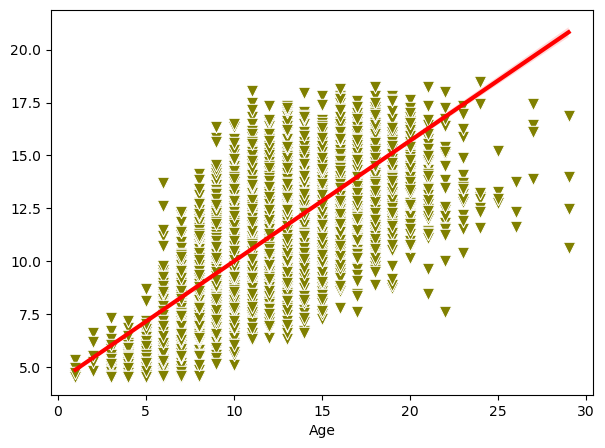

In [51]:
plt.figure(figsize=(7,5))
sns.regplot(x=Y_test,y=lgb_pred,color="red",line_kws={'linewidth': 3},scatter=False)
sns.scatterplot(x=Y_test, y=lgb_pred,color="olive",marker="v",s=80)

plt.show()

# Create CatBoost Model

In [52]:
cat_model = CatBoostRegressor(iterations=1000,loss_function='RMSE',learning_rate=0.1,depth=6,
                              random_seed=42,l2_leaf_reg=3)

cat_model.fit( X_train, Y_train,eval_set=(X_test, Y_test), early_stopping_rounds=100,verbose=100)

0:	learn: 3.0305406	test: 3.0503463	best: 3.0503463 (0)	total: 58.5ms	remaining: 58.4s
100:	learn: 2.0737451	test: 2.0867489	best: 2.0867489 (100)	total: 846ms	remaining: 7.53s
200:	learn: 2.0335389	test: 2.0677828	best: 2.0677828 (200)	total: 1.61s	remaining: 6.39s
300:	learn: 2.0042257	test: 2.0608336	best: 2.0608336 (300)	total: 2.38s	remaining: 5.53s
400:	learn: 1.9804188	test: 2.0572693	best: 2.0572693 (400)	total: 3.16s	remaining: 4.71s
500:	learn: 1.9595179	test: 2.0557012	best: 2.0557012 (500)	total: 3.93s	remaining: 3.91s
600:	learn: 1.9415767	test: 2.0553006	best: 2.0551470 (517)	total: 4.73s	remaining: 3.14s
700:	learn: 1.9247774	test: 2.0558610	best: 2.0549291 (616)	total: 5.5s	remaining: 2.35s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 2.054929106
bestIteration = 616

Shrink model to first 617 iterations.


In [53]:
cat_pred=cat_model.predict(X_test)
mse6 = mean_squared_error(Y_test,cat_pred)
print("Mean Squared Error:", mse6)
mae6= mean_absolute_error(Y_test,cat_pred)
print("Mean Absolute Error:", mae6)
r26 = r2_score(Y_test,cat_pred)
print("R2 Score:", r26)

Mean Squared Error: 4.222733630060183
Mean Absolute Error: 1.4254178089529754
R2 Score: 0.5856639430446344


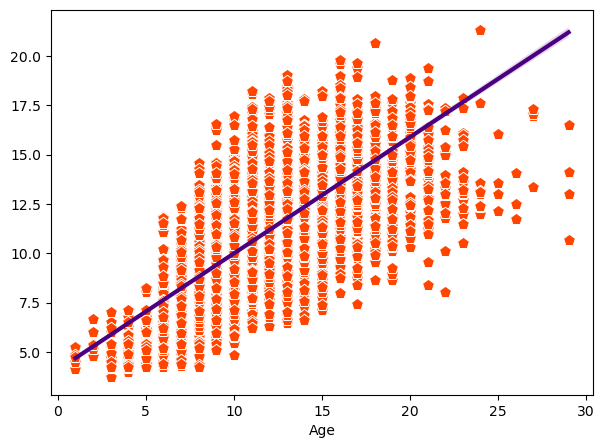

In [54]:
plt.figure(figsize=(7,5))
sns.regplot(x=Y_test,y=cat_pred,color="indigo",line_kws={'linewidth': 3},scatter=False)
sns.scatterplot(x=Y_test, y=cat_pred,color="orangered",marker="p",s=80)

plt.show()

# All Model Result Comparison

In [55]:
all_mse_score = [mse, mse1, mse2, mse3, mse4, mse5, mse6]
all_mae_score = [mae, mae1, mae2, mae4, mae4, mae5, mae6]
all_r2_score = [r2, r21, r22, r23, r24, r25, r26]
all_model = ['ln_model', 'random_regr', 'gb', 'xgb', 'rd', 'lgb_model', 'cat_model']

data = {'Model': all_model,'MSE': all_mse_score,'MAE': all_mae_score,'R2_Score': all_r2_score}
df = pd.DataFrame(data)

df

,Model,MSE,MAE,R2_Score
0,ln_model,4.644759,1.511752,0.544255
1,random_regr,4.494260,1.492189,0.559022
2,gb,4.330952,1.447522,0.575045
3,xgb,4.340278,1.511740,0.574130
4,rd,4.644720,1.511740,0.544259
5,lgb_model,4.262202,1.433390,0.581791
6,cat_model,4.222734,1.425418,0.585664


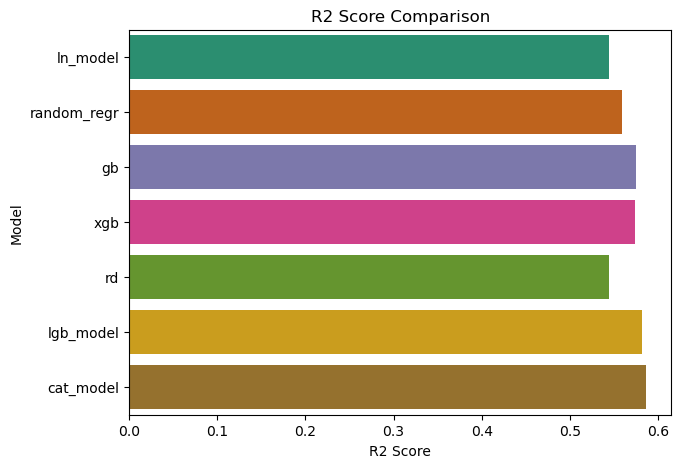

In [56]:
plt.figure(figsize=(7, 5))
sns.barplot(y="Model", x="R2_Score", data=df, palette="Dark2")
plt.title('R2 Score Comparison')
plt.xlabel('R2 Score')
plt.ylabel('Model')
plt.show()

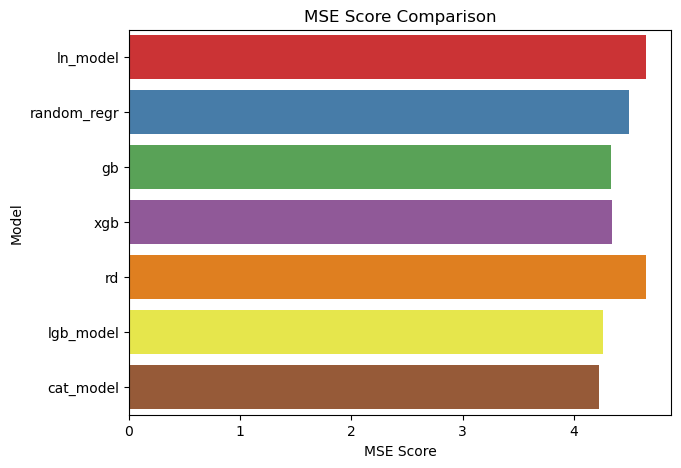

In [57]:
plt.figure(figsize=(7, 5))
sns.barplot(y="Model", x="MSE", data=df, palette="Set1")
plt.title('MSE Score Comparison')
plt.xlabel('MSE Score')
plt.ylabel('Model')
plt.show()

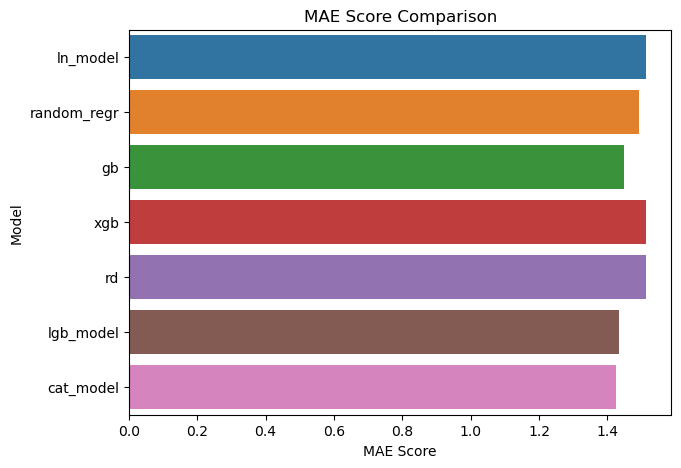

In [58]:
plt.figure(figsize=(7, 5))
sns.barplot(y="Model", x="MAE", data=df, palette="tab10")
plt.title('MAE Score Comparison')
plt.xlabel('MAE Score')
plt.ylabel('Model')
plt.show()

# Test Data Analysis

In [59]:
df_test.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,74051,I,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
1,74052,I,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
2,74053,F,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
3,74054,F,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
4,74055,I,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066


In [60]:
df_test.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
dtype: int64

In [61]:
df_test.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight'],
      dtype='object')

In [62]:
df_test.describe()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
count,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000
mean,98734.500000,1.319795,1.026357,0.348693,23.464627,10.130220,5.072615,6.745876
std,14251.458382,0.286950,0.236593,0.092259,12.641703,5.611779,2.791563,3.575650
min,74051.000000,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524
25%,86392.750000,1.162500,0.887500,0.300000,13.536886,5.740774,2.877474,3.968930
50%,98734.500000,1.387500,1.075000,0.362500,23.813580,9.979024,4.989512,6.945627
75%,111076.250000,1.537500,1.200000,0.412500,32.290081,14.047177,7.016501,9.171063
max,123418.000000,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248


In [63]:
df_test["Sex"]=label_encoder.fit_transform(df_test["Sex"])
df_test.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,74051,1,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
1,74052,1,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
2,74053,0,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
3,74054,0,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
4,74055,1,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066


# Submit My Result

In [64]:
my_prediction=cat_model.predict(df_test)
my_submission=pd.DataFrame({'id':df_test.id,'Age':my_prediction})
my_submission.to_csv('submission.csv',index=False)